<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML_KMeans_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means algorithm

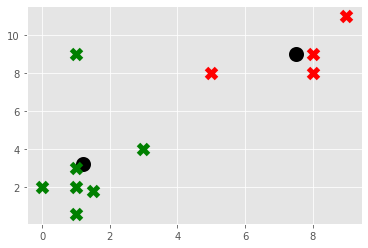

##K-means example

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing
# from sklearn.model_selection import train_test_split

In [2]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

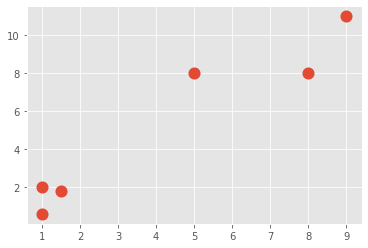

In [3]:
plt.scatter(X[:,0], X[:,1], s = 50, linewidths = 5) #All rows from first col, all rows from 2nd col
plt.show()

In [4]:
clf = KMeans(n_clusters = 2)
clf.fit(X)

KMeans(n_clusters=2)

In [5]:
centroids = clf.cluster_centers_
labels = clf.labels_

In [6]:
colors = ['g.', 'r.', 'c.', 'b.', 'k.', 'o.']

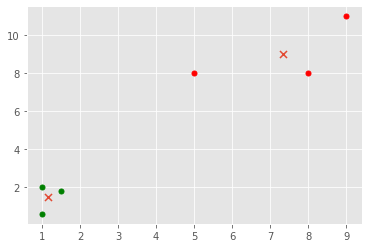

In [7]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 50, linewidths = 5)
plt.show()

##Titanic dataset

In [8]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0



* pclass - passenger class (1, 2, 3)
* survival - survival (0 = no, 1 = yes)
*   sibsp - number of siblings/spouses aboard
*   parch - number of parents/children aborad
* ticket - ticket number
* fare - passenger fare (british pounds)
* cabin
* embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat - lifeboat
* body - body identification number
* home.dest - home/destination


In [58]:
df = pd.read_excel('/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###Data preprocessing

In [59]:
df.drop(['body', 'name'], axis = 1, inplace = True)

In [60]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


###Handling categorical data - converting to numbers

In [61]:
df.apply(pd.to_numeric, errors='ignore')
df.fillna(0, inplace = True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


####LabelEncoder

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   object 
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   object 
 7   fare       1309 non-null   float64
 8   cabin      1309 non-null   object 
 9   embarked   1309 non-null   object 
 10  boat       1309 non-null   object 
 11  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [64]:
import pickle

columns = df.columns.values

for column in columns:
  if df[column].dtype != np.int64 and df[column].dtype != np.float64:
    le = LabelEncoder()
    df[column] = df[column].astype('string')
    df[column] = le.fit_transform(df[column])

    filehandler = open(f'/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/{df[column].name}.obj','wb')
    pickle.dump(le, filehandler)
    filehandler.close()

    df[column] = le.fit_transform(df[column])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   int64  
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   ticket     1309 non-null   int64  
 7   fare       1309 non-null   float64
 8   cabin      1309 non-null   int64  
 9   embarked   1309 non-null   int64  
 10  boat       1309 non-null   int64  
 11  home.dest  1309 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


In [66]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,187,211.3375,44,3,12,309
1,1,1,1,0.9167,1,2,49,151.5500,80,3,3,231
2,1,0,0,2.0000,1,2,49,151.5500,80,3,0,231
3,1,0,1,30.0000,1,2,49,151.5500,80,3,0,231
4,1,0,0,25.0000,1,2,49,151.5500,80,3,0,231


####Reversal of mapping

In [67]:
file = open('/content/drive/MyDrive/Projekty Machine Learning/ML_KMeans/sex.obj','rb')
le_loaded = pickle.load(file)
file.close()

# df['sex'] = le_loaded.inverse_transform(df['sex'])
# df.head()

###Feeding K-means algorithm with data

####Processing and **scaling** the data

In [68]:
X = np.array(df.drop(['survived'], axis = 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

In [69]:
X[0]

array([-1.54609786, -1.34499549,  0.29131302, -0.47908676, -0.4449995 ,
       -0.9951879 ,  3.44242751,  0.45937395,  0.62364835,  0.87831713,
        1.58086456])

In [70]:
clf = KMeans(n_clusters = 2)
clf.fit(X)

KMeans(n_clusters=2)

In [71]:
correct = 0
for i in range(len(X)):
  # to_predict = np.array(X[i].astype(float))
  to_predict = X[i]
  to_predict = to_predict.reshape(-1, len(to_predict))
  prediction = clf.predict(to_predict)
  if prediction[0] == y[i]:
    correct += 1

print(correct/len(X))

0.29411764705882354


In [72]:
np.array(X[i].astype(float)) == X[i]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

The result can be different, for example, once 0.7 or 0.3. It does not matter, because the cluster "0" can be associated with the value "0" or "1". There are only two clusters.

####Dropping columns to improve the result


In [75]:
copy = df.copy()

In [76]:
X = np.array(copy.drop(['ticket', 'embarked', 'survived'], axis = 1).astype(float))
X = preprocessing.scale(X)
y = np.array(copy['survived'])

clf = KMeans(n_clusters = 2)
clf.fit(X)

correct = 0
for i in range(len(X)):
  # to_predict = np.array(X[i].astype(float))
  to_predict = X[i]
  to_predict = to_predict.reshape(-1, len(to_predict))
  prediction = clf.predict(to_predict)
  if prediction[0] == y[i]:
    correct += 1

print(correct/len(X))

0.7135217723453018


 The algorithm shows with 70% of accuracy which passenger would survive.

##Custom K-means algorithm

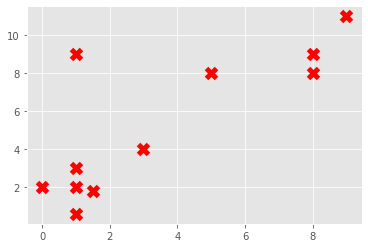

In [133]:
Z = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11],
              [1, 3],
              [8,9],
              [0,2],
              [3,4],
              [1,9]])

plt.scatter(Z[:,0], Z[:,1], marker = 'x', color = color, s=100, linewidth = 5) #All rows from first col, all rows from 2nd col
plt.show()

colors = ['g', 'r', 'c', 'b', 'k', 'o']

In [100]:
class K_means:
  def __init__(self, k = 2, tol = 0.001, max_iter = 300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self, data):
    self.centroids = {}

    for i in range(self.k):
      self.centroids[i] = data[i]

    for i in range(self.max_iter):
      self.classifications = {}

      for i in range(self.k):
        self.classifications[i] = []

      for featureset in data:
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)

      prev_centroids = dict(self.centroids) #how much they changed

      for classification in self.classifications:
        # pass
        self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
      
      optimized = True
      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroids[c]
        if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
          optimized = False

      if optimized:
        break


  def predict(self, data):
    distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification

In [101]:
clf = K_means()
clf.fit(Z)

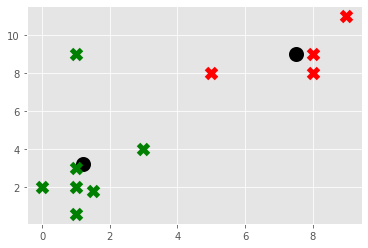

In [102]:
for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker = 'o', color = 'k', s=100, linewidths = 5)

for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker = 'x', color = color, s=100, linewidth = 5)

plt.show()

####Comparison with scikit K-means

In [123]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Z)
y_kmeans = np.array(kmeans.predict(Z))
y_kmeans

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int32)

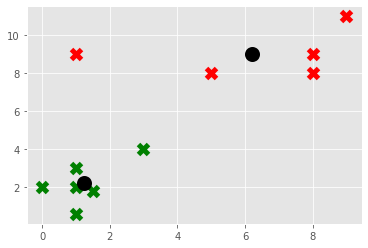

In [132]:
for point in range(len(Z)):
  result = y_kmeans[point]
  plt.scatter(Z[point][0], Z[point][1], color = colors[result], marker = 'x', s=100, linewidth = 5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'o', color = 'k', s=100, linewidths = 5)

plt.show()

####Predictions

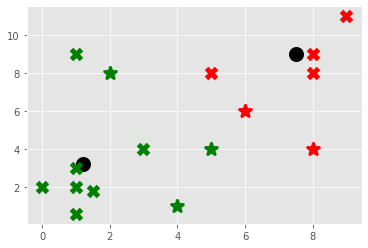

In [136]:
unknowns = np.array([[4, 1],
                     [5,4],
                     [6,6],
                     [8,4],
                     [2,8]])

for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker = 'o', color = 'k', s=100, linewidths = 5)

for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker = 'x', color = color, s=100, linewidth = 5)

for unknown in unknowns:
  classification = clf.predict(unknown)
  plt.scatter(unknown[0], unknown[1], marker = '*', color = colors[classification], s=150, linewidths = 3)

plt.show()

In [107]:
clf.classifications

{0: [array([1., 2.]),
  array([1.5, 1.8]),
  array([1. , 0.6]),
  array([1., 3.]),
  array([0., 2.]),
  array([3., 4.]),
  array([1., 9.])],
 1: [array([5., 8.]), array([8., 8.]), array([ 9., 11.]), array([8., 9.])]}

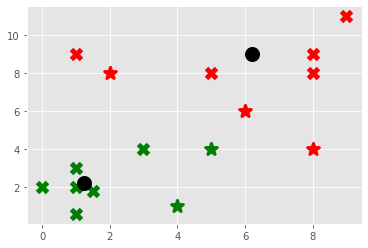

In [152]:
predictions = kmeans.predict(unknowns)

for point in range(len(Z)):
  result = y_kmeans[point]
  plt.scatter(Z[point][0], Z[point][1], color = colors[result], marker = 'x', s=100, linewidth = 5)

for point in range(len(unknowns)):
  prediction = predictions[point]
  plt.scatter(unknowns[point][0], unknowns[point][1], color = colors[prediction], marker = '*', s=150, linewidth = 3)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'o', color = 'k', s=100, linewidths = 5)

plt.show()

####Decision boundaries

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


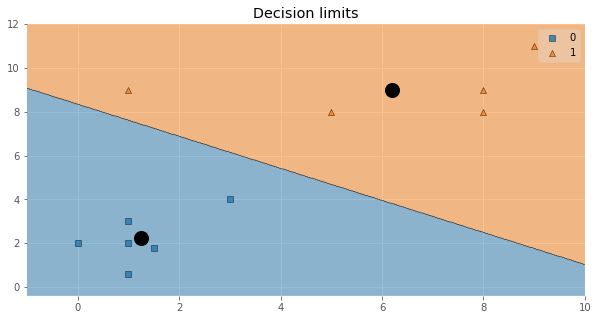

In [141]:
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

kmeans = KMeans(n_clusters=2)
kmeans.fit(Z)
y_kmeans = kmeans.predict(Z)

plt.figure(figsize=(10, 5))
plt.title('Decision boundaries')
plot_decision_regions(Z, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'o', color = 'k', s=100, linewidths = 5)
plt.show()